In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('happiness_data.csv')   #Loading the dataset

## **THE DATA**



In [ ]:
df


Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1944     Zimbabwe  2016        3.735               7.984           0.768   
1945     Zimbabwe  2017        3.638               8.016           0.754   
1946     Zimbabwe  2018        3.616               8.049           0.775   
1947     Zimbabwe  2019        2.694               7.950           0.759   
1948     Zimbabwe  2020        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0          0.168                      0.882            0.518            0.258  
1          0.190                      0.850            0.584            0.237  
2          0.121                      0.707            0.618            0.275  
3          0.162                      0.731            0.611            0.267  
4          0.236                      0.776            0.710            0.268  
...          ...                        ...              ...              ...  
1944      -0.095                      0.724            0.738            0.209  
1945      -0.098                      0.751            0.806            0.224  
1946      -0.068                      0.844            0.710            0.212  
1947      -0.064                      0.831            0.716            0.235  
1948      -0.009                      0.789            0.703            0.346  

[1949 rows x 11 columns]

## **Information of our Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


## **Checking how much data is present using 'shape'**

In [ ]:
df.shape


(1949, 11)

In [ ]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1949
Number of columns: 11


## **Checking what attributes/features are continuous valued**

In [ ]:
continuous = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
continuous

['year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

## **Checking what attribute/features are categorical**

In [ ]:
categorical = [col for col in df.columns if df[col].dtype in ['object']]
categorical

['Country name']

## **Statistical values of the attributes**

In [ ]:
df.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                           32.300000                      0.258000   
25%                           58.685000                      0.647000   
50%                           65.200000                      0.763000   
75%                           68.590000                      0.856000   
max                           77.100000                      0.985000   

        Generosity  Perceptions of corruption  Positive affect  \
count  1860.000000                1839.000000      1927.000000   
mean      0.000103                   0.747125         0.710003   
std       0.162215                   0.186789         0.107100   
min      -0.335000                   0.035000         0.322000   
25%      -0.113000                   0.690000         0.625500   
50%      -0.025500                   0.802000         0.722000   
75%       0.091000                   0.872000         0.799000   
max       0.698000                   0.983000         0.944000   

       Negative affect  
count      1933.000000  
mean          0.268544  
std           0.085168  
min           0.083000  
25%           0.206000  
50%           0.258000  
75%           0.320000  
max           0.705000

##**Histogram for each attribute**


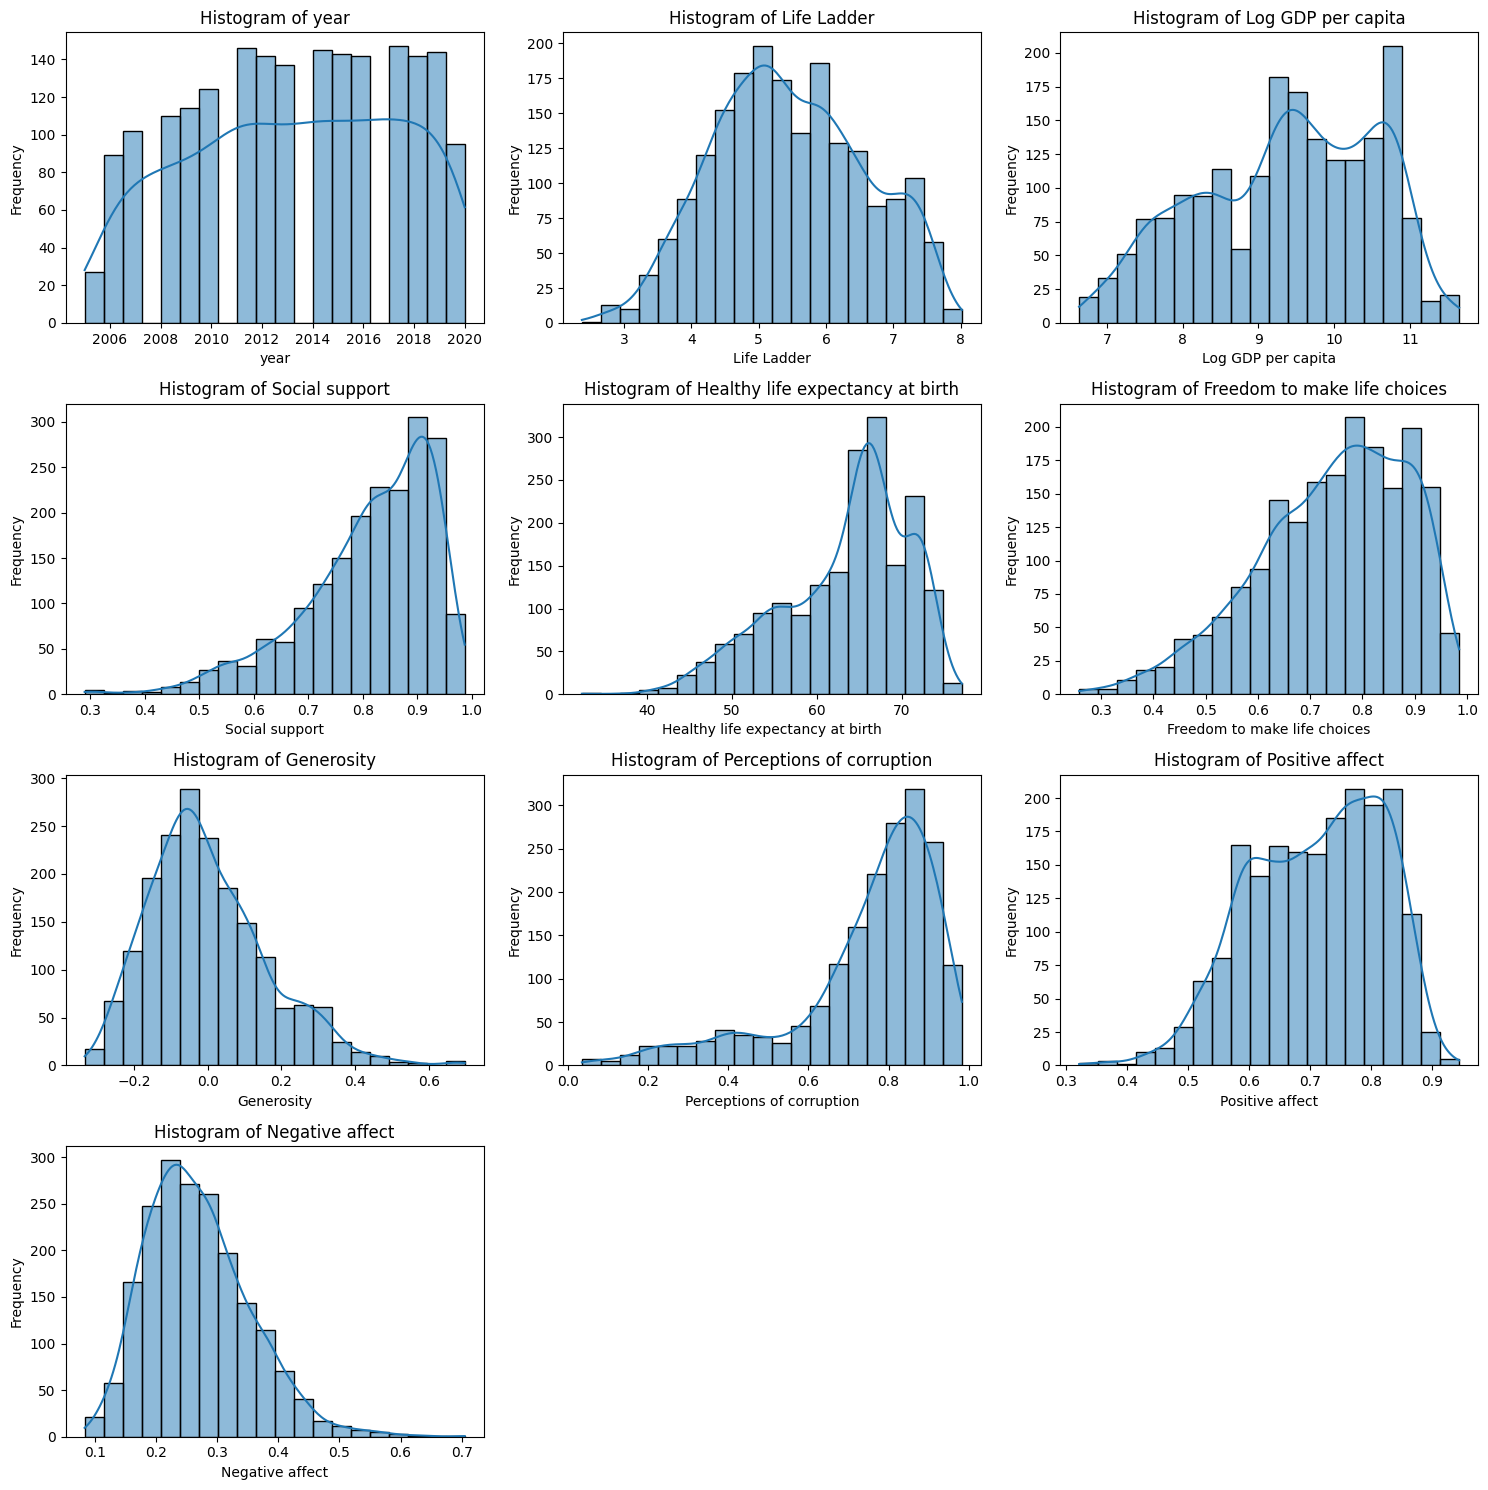

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Flatten 2D array of axes for easy iteration
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, ax=ax, bins=20, kde=True)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove any empty subplots if the number of attributes is not a multiple of num_cols
if len(numerical_columns) % num_cols != 0:
    for i in range(len(numerical_columns), num_rows * num_cols):
       fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

##**Noticeable Traits**

In [ ]:
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

We can see that most of the columns have missing values. To handle missing values we can either drop the rows or columns or use other methods such as mean or median imputation etc.

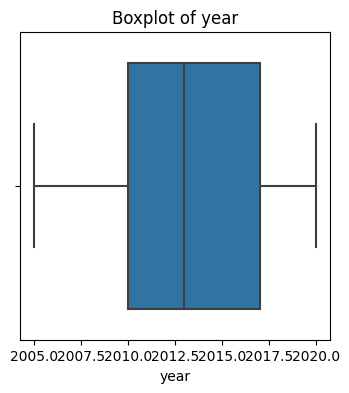

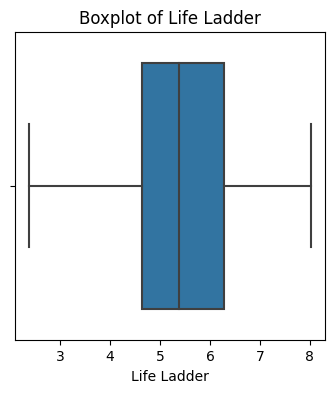

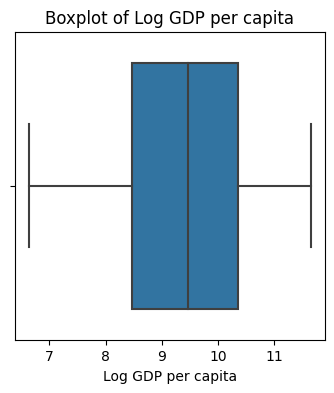

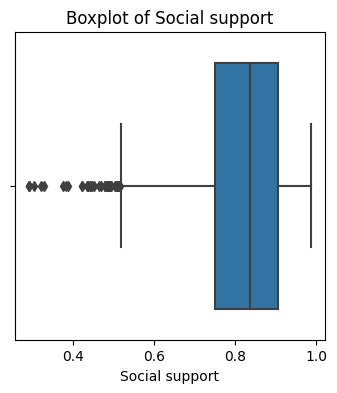

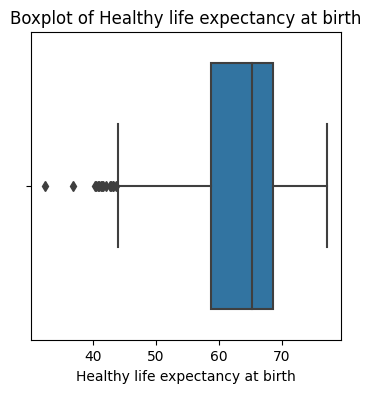

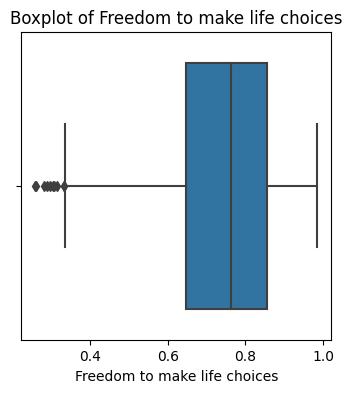

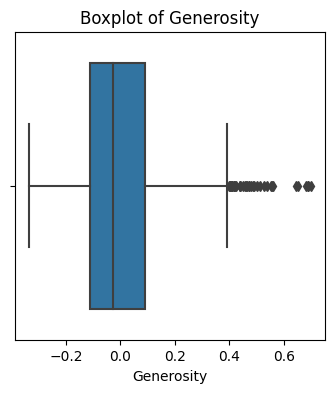

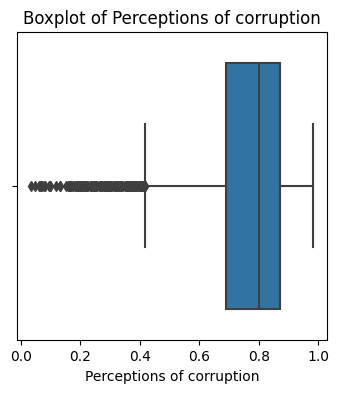

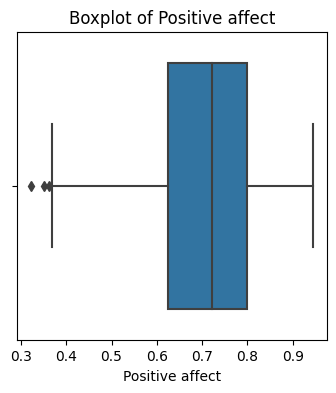

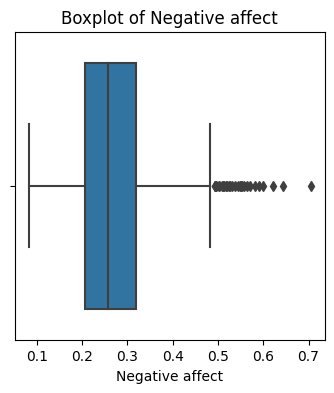

In [ ]:
# Check outliers
# Plot boxplot
continuous = df.select_dtypes(include=['float64', 'int64'])
for column in continuous.columns:
  plt.figure(figsize=(4, 4))
  sns.boxplot(data=df, x=column)
  plt.title(f'Boxplot of {column}')
  plt.xlabel(column)
  plt.show()

From the boxplots, we can see that some of the attributes have outliers. We can either remove the outliers or use standardized scaling.

In [ ]:
df1 = df.copy()

## **Pearson Correlation Coefficient (PCC) TABLE**

year  Life Ladder  Log GDP per capita  \
year                              1.000000     0.035515            0.078246   
Life Ladder                       0.035515     1.000000            0.790166   
Log GDP per capita                0.078246     0.790166            1.000000   
Social support                   -0.010093     0.707806            0.692602   
Healthy life expectancy at birth  0.164059     0.744506            0.848049   
Freedom to make life choices      0.222151     0.528063            0.367932   
Generosity                       -0.043422     0.190632           -0.000915   
Perceptions of corruption        -0.081478    -0.427245           -0.345511   
Positive affect                  -0.003245     0.532273            0.302282   
Negative affect                   0.196869    -0.297488           -0.210781   

                                  Social support  \
year                                   -0.010093   
Life Ladder                             0.707806   
Log GDP per capita                      0.692602   
Social support                          1.000000   
Healthy life expectancy at birth        0.616037   
Freedom to make life choices            0.410402   
Generosity                              0.067000   
Perceptions of corruption              -0.219040   
Positive affect                         0.432152   
Negative affect                        -0.395865   

                                  Healthy life expectancy at birth  \
year                                                      0.164059   
Life Ladder                                               0.744506   
Log GDP per capita                                        0.848049   
Social support                                            0.616037   
Healthy life expectancy at birth                          1.000000   
Freedom to make life choices                              0.388681   
Generosity                                                0.020737   
Perceptions of corruption                                -0.322461   
Positive affect                                           0.318247   
Negative affect                                          -0.139477   

                                  Freedom to make life choices  Generosity  \
year                                                  0.222151   -0.043422   
Life Ladder                                           0.528063    0.190632   
Log GDP per capita                                    0.367932   -0.000915   
Social support                                        0.410402    0.067000   
Healthy life expectancy at birth                      0.388681    0.020737   
Freedom to make life choices                          1.000000    0.329300   
Generosity                                            0.329300    1.000000   
Perceptions of corruption                            -0.487883   -0.290706   
Positive affect                                       0.606114    0.358006   
Negative affect                                      -0.267661   -0.092542   

                                  Perceptions of corruption  Positive affect  \
year                                              -0.081478        -0.003245   
Life Ladder                                       -0.427245         0.532273   
Log GDP per capita                                -0.345511         0.302282   
Social support                                    -0.219040         0.432152   
Healthy life expectancy at birth                  -0.322461         0.318247   
Freedom to make life choices                      -0.487883         0.606114   
Generosity                                        -0.290706         0.358006   
Perceptions of corruption                          1.000000        -0.296517   
Positive affect                                   -0.296517         1.000000   
Negative affect                                    0.264225        -0.374439   

                                  Negative affect  
year                            

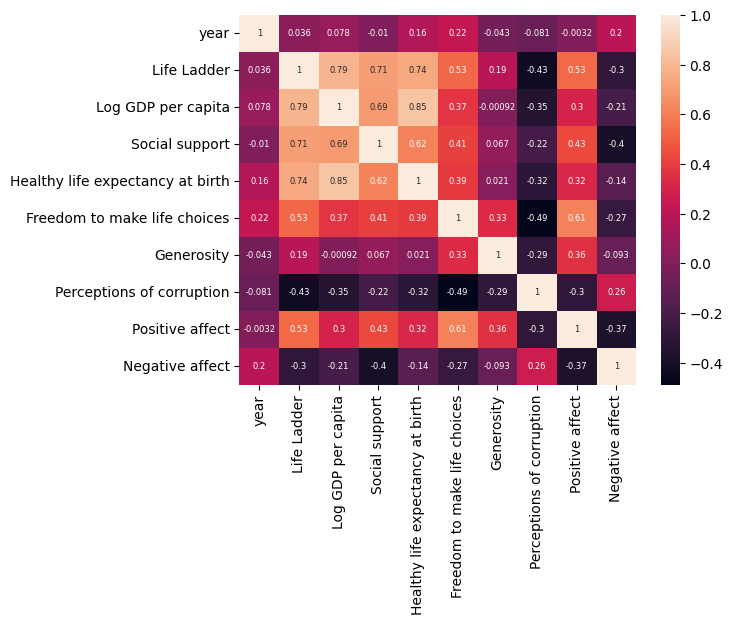

In [ ]:
# Calculate the Pearson Correlation Coefficient (PCC) between data attributes and label
correlations = df1.corr(numeric_only=True)
sns.heatmap(df1.corr(), annot = True, annot_kws={"size": 6});
correlations

In [ ]:
target_attribute = 'Life Ladder'
correlation_with_target = df1.corr(numeric_only=True)[target_attribute].sort_values(ascending=False)
correlation_with_target

Life Ladder                         1.000000
Log GDP per capita                  0.790166
Healthy life expectancy at birth    0.744506
Social support                      0.707806
Positive affect                     0.532273
Freedom to make life choices        0.528063
Generosity                          0.190632
year                                0.035515
Negative affect                    -0.297488
Perceptions of corruption          -0.427245
Name: Life Ladder, dtype: float64



*   The correlation of the Target Variable, **'Life Ladder'**  shows a strong correlation with attributes like **Log GDP per capita**, **Healthy life expectancy at birth**, **Social Support**

*   The attributes, **Negative effect** and **Perceptions of corruption** has a negative correlation with the target variable.



# **SCATTER PLOTS**

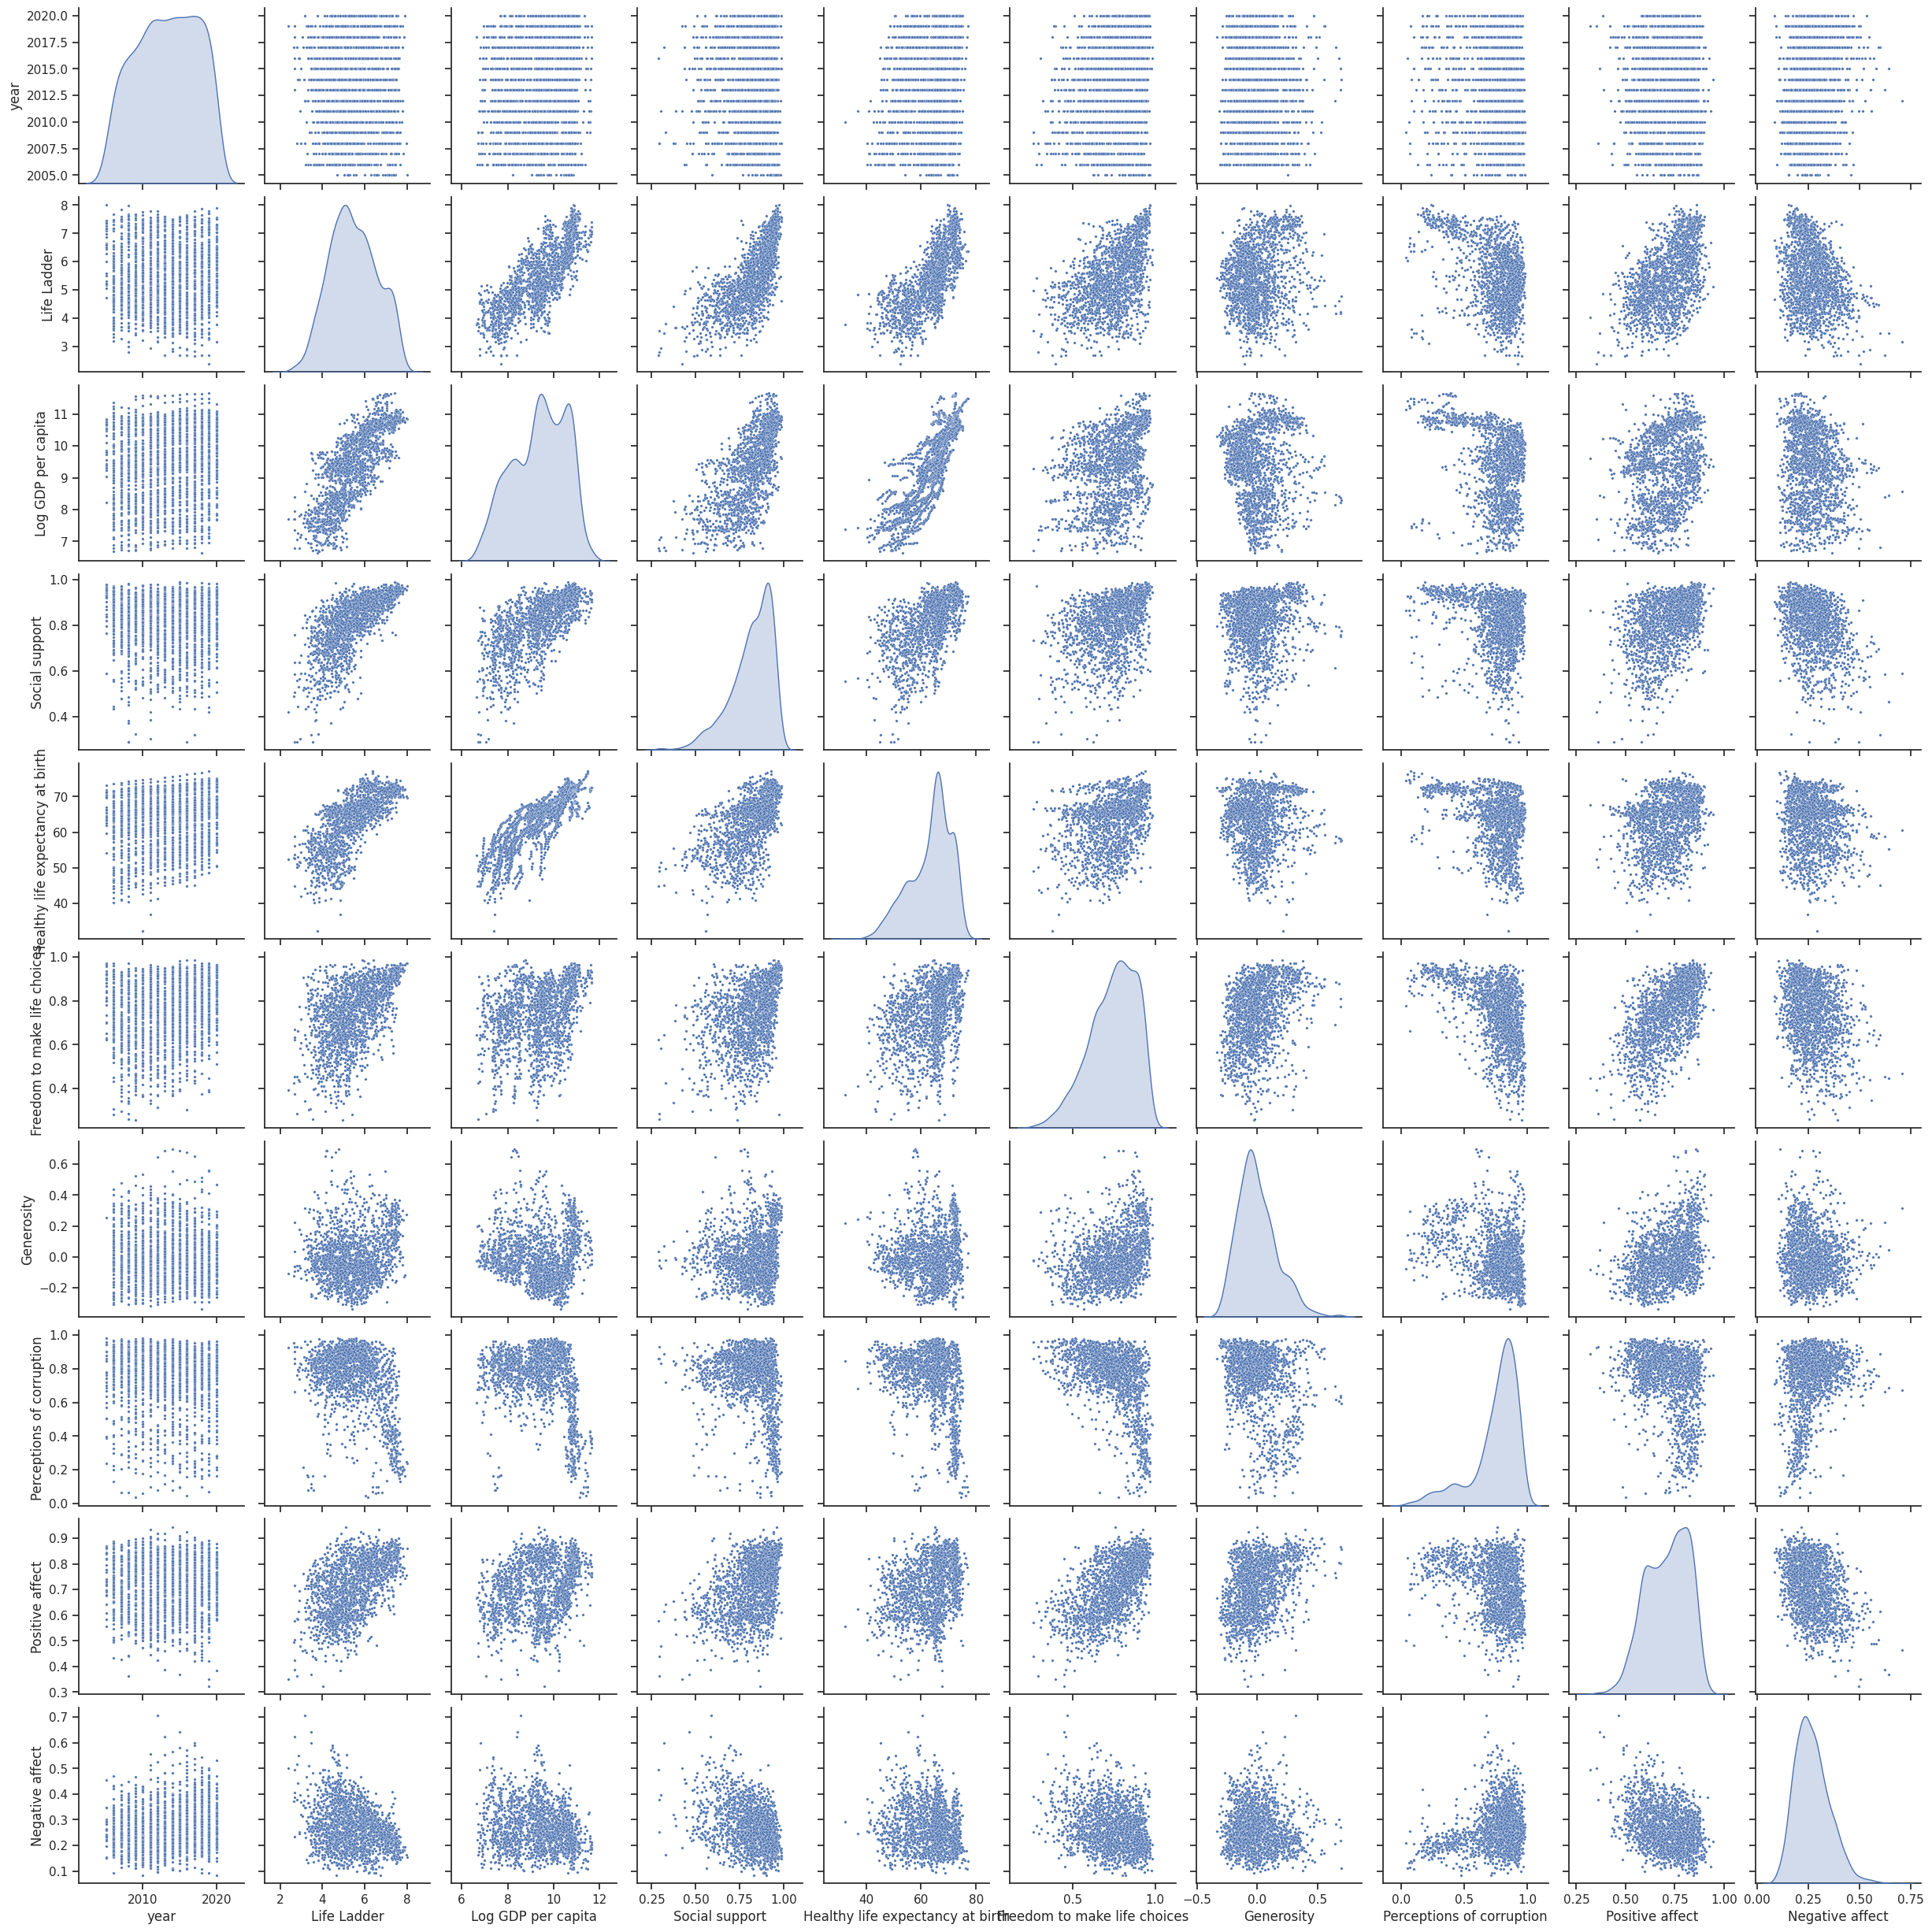

In [ ]:
# Creating scatterplots for all columns against each other
sns.set(style="ticks")
sns.pairplot(df1, diag_kind="kde", markers="o", plot_kws={"s": 6}, height=2.5)
plt.show()

## **Replacing the missing values with Mean**

In [ ]:
# Replacing all the null values with the mean or median of the respective attributes
# Replaced Generosity with median and all other attributes with mean

for column in df1.columns[1:]:
    if column == 'Generosity':
        median_value = df1[column].median()
        df1[column] = df1[column].fillna(median_value)
    else:
        mean_value = df1[column].mean()
        df1[column] = df1[column].fillna(mean_value)

## **Preparing X as features and y as target**

In [ ]:
df1 = df1.drop(columns=['year'])
y = df1['Life Ladder']
X = df1.drop(columns=['Life Ladder', 'Country name'])

## **Splitting 80% of the data for training and 20% for testing**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Proof that the test data is representative of the whole dataset**

In [ ]:
train_summary = X_train.describe()
test_summary = X_test.describe()
train_summary


Log GDP per capita  Social support  Healthy life expectancy at birth  \
count         1559.000000     1559.000000                       1559.000000   
mean             9.363086        0.812689                         63.332337   
std              1.150518        0.118380                          7.388976   
min              6.635000        0.290000                         32.300000   
25%              8.474000        0.753500                         58.700000   
50%              9.438000        0.834000                         65.020000   
75%             10.313500        0.905000                         68.400000   
max             11.648000        0.987000                         77.100000   

       Freedom to make life choices   Generosity  Perceptions of corruption  \
count                   1559.000000  1559.000000                1559.000000   
mean                       0.741892    -0.000834                   0.748187   
std                        0.141318     0.159710                   0.181482   
min                        0.260000    -0.335000                   0.035000   
25%                        0.649000    -0.106500                   0.699500   
50%                        0.759000    -0.025500                   0.794000   
75%                        0.853500     0.084000                   0.868000   
max                        0.985000     0.698000                   0.983000   

       Positive affect  Negative affect  
count      1559.000000      1559.000000  
mean          0.708567         0.267652  
std           0.107438         0.084051  
min           0.322000         0.083000  
25%           0.624500         0.207000  
50%           0.718000         0.260000  
75%           0.798000         0.319000  
max           0.944000         0.705000

In [ ]:
test_summary

Log GDP per capita  Social support  Healthy life expectancy at birth  \
count          390.000000      390.000000                        390.000000   
mean             9.389904        0.812007                         63.467451   
std              1.115531        0.117052                          7.469661   
min              6.723000        0.326000                         40.808000   
25%              8.508750        0.742500                         59.680000   
50%              9.461500        0.833500                         64.970000   
75%             10.392000        0.906500                         68.475000   
max             11.520000        0.975000                         75.000000   

       Freedom to make life choices  Generosity  Perceptions of corruption  \
count                    390.000000  390.000000                 390.000000   
mean                       0.745219   -0.001995                   0.742882   
std                        0.139472    0.154058                   0.181434   
min                        0.258000   -0.296000                   0.078000   
25%                        0.661000   -0.104750                   0.696250   
50%                        0.760000   -0.025500                   0.785000   
75%                        0.854500    0.087250                   0.865750   
max                        0.980000    0.650000                   0.983000   

       Positive affect  Negative affect  
count       390.000000       390.000000  
mean          0.715744         0.272110  
std           0.102563         0.087836  
min           0.369000         0.103000  
25%           0.636250         0.206250  
50%           0.722000         0.259500  
75%           0.803750         0.321750  
max           0.901000         0.643000

## **RMSE value for the Linear Regression**

##**Four-fold cross-validation using SVD**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def cross_val_rmse(model, X, y):
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=4, scoring='neg_mean_squared_error'))
    return np.mean(rmse_scores)

lr_reg = LinearRegression()
lr_reg_rmse = cross_val_rmse(lr_reg, X_train, y_train)
print("SVD RMSE Score: ", lr_reg_rmse)

SVD RMSE Score:  0.5477414412785013


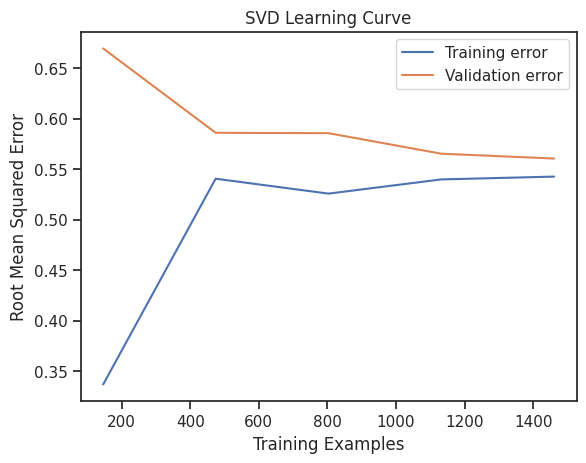

In [ ]:
#SVD Learning Curve

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(lr_reg, X, y, cv=4, scoring="neg_mean_squared_error")

train_rmse = np.sqrt(-train_scores)
train_scores_mean = train_rmse.mean(axis = 1)
test_rmse = np.sqrt(-test_scores)
test_scores_mean = test_rmse.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()
plt.title("SVD Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Root Mean Squared Error")
plt.show()

In [ ]:
lr_reg.fit(X_train, y_train)

y_pred = lr_reg.predict(X_test)


## **R^2 value for Linear Regression**

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
r_squared

0.7597856148684276

## **Training Score for Linear Regression**

In [ ]:
train_score = lr_reg.score(X_train, y_train)
train_score

0.7601628981668799

## **Linear Regression plot**

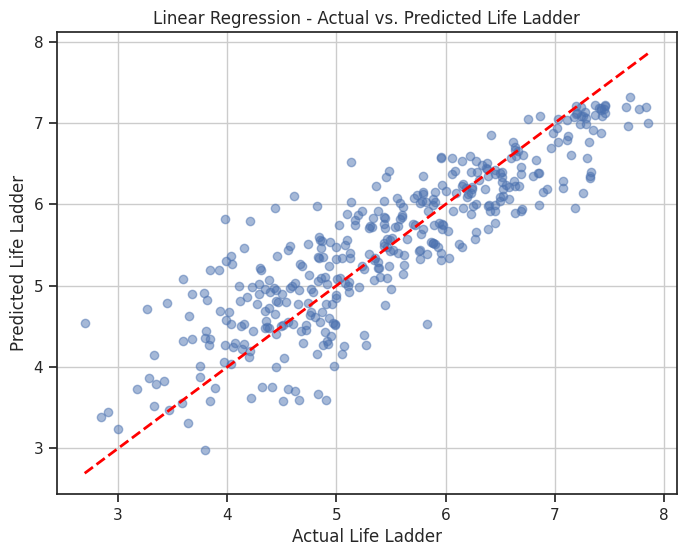

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Life Ladder")
plt.ylabel("Predicted Life Ladder")
plt.title("Linear Regression - Actual vs. Predicted Life Ladder")
plt.grid(True)


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()

## **Ridge with different penalty terms**

In [ ]:
from sklearn.linear_model import Ridge

alpha_values = [0.01, 0.1, 0.5, 1.0, 10.0]
ridge_rmse_values = []

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge_rmse = cross_val_rmse(ridge, X_train, y_train)
    ridge_rmse_values.append(ridge_rmse)

ridge_rmse_values

[0.5477374272785671,
 0.5477072691736465,
 0.5476852201679282,
 0.5478516465449357,
 0.5584242780513009]

## **Lasso with different penalty terms**

In [ ]:
from sklearn.linear_model import Lasso

alpha_values = [0.01, 0.1, 0.5, 1.0, 10.0]
lasso_rmse_values = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso_rmse = cross_val_rmse(lasso, X_train, y_train)
    lasso_rmse_values.append(lasso_rmse)

lasso_rmse_values

[0.5647794140264716,
 0.6857134504993846,
 0.7430024672551817,
 0.7521629738467863,
 1.1135368907767966]

## **Elastic Net with different penalty terms**

In [ ]:
from sklearn.linear_model import ElasticNet

alpha_values = [0.01, 0.1, 0.5, 1.0, 10.0]
elastic_rmse_values = []

for alpha in alpha_values:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_rmse = cross_val_rmse(elastic_net, X_train, y_train)
    elastic_rmse_values.append(elastic_rmse)

elastic_rmse_values

[0.5625005168706924,
 0.6781898634143348,
 0.7408871286773103,
 0.7436609091097043,
 1.0122775595879276]

## **SGD for different learning rates and different batch sizes**

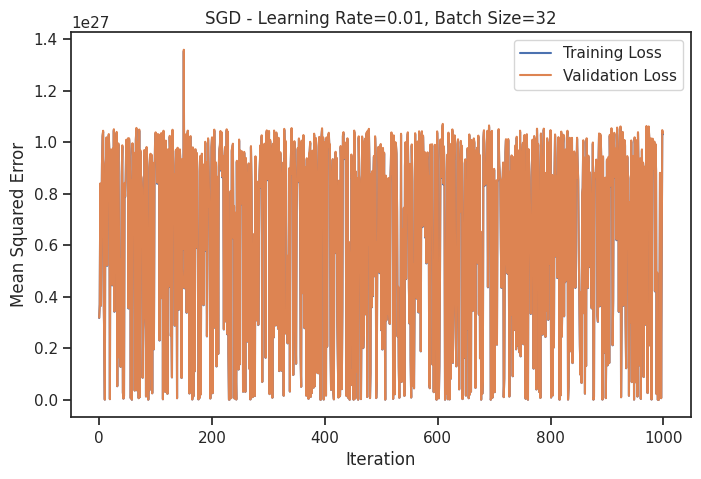

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

def train_and_evaluate_sgd(lr, batch_size, n_iterations, X_train, y_train, X_test, y_test):
    sgd = SGDRegressor(
        alpha=0.1,
        learning_rate='constant',
        eta0=lr,
        max_iter=n_iterations,
        tol=1e-3,
        penalty=None,
        random_state=42
    )

    training_losses = []
    validation_losses = []

    for _ in range(n_iterations):
        for batch_start in range(0, len(X_train), batch_size):
            X_batch = X_train[batch_start:batch_start + batch_size]
            y_batch = y_train[batch_start:batch_start + batch_size]
            sgd.partial_fit(X_batch, y_batch)

        # training loss
        train_loss = mean_squared_error(y_train, sgd.predict(X_train))
        training_losses.append(train_loss)

        # validation loss
        val_loss = mean_squared_error(y_test, sgd.predict(X_test))
        validation_losses.append(val_loss)

    return training_losses, validation_losses

# hyperparameters
learning_rates = [0.01, 0.1, 0.5]
batch_sizes = [32, 64, 128]
n_iterations = 1000

sgd_results = []


for lr in learning_rates:
    for batch_size in batch_sizes:

        training_losses, validation_losses = train_and_evaluate_sgd(
            lr, batch_size, n_iterations, X_train, y_train, X_test, y_test
        )


        sgd_results.append({
            'Learning Rate': lr,
            'Batch Size': batch_size,
            'Final Training Loss': training_losses[-1],
            'Final Validation Loss': validation_losses[-1]
        })


        plt.figure(figsize=(8, 5))
        plt.plot(range(n_iterations), training_losses, label='Training Loss')
        plt.plot(range(n_iterations), validation_losses, label='Validation Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.legend()
        plt.title(f'SGD - Learning Rate={lr}, Batch Size={batch_size}')
        plt.show()

sgd_results_df = pd.DataFrame(sgd_results)
print(sgd_results_df)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import itertools

# Assuming you have a DataFrame df with 7 columns, and the target variable is in the first column (index 0)
X = df.iloc[:, 1:]  # Features
y = df.iloc[:, 0]   # Target variable

# Hyperparameters
alphas = [0.001, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]
learning_rates = [0.01, 0.1, 0.5, 1.0, 10.0]

# Initialize K-Fold cross-validation
n_splits = 4
kf = KFold(n_splits=n_splits)

# Lists to store training and validation losses
training_losses = []
validation_losses = []

# Iterate over regularization methods and alpha values
for alpha in alphas:
    for learning_rate in learning_rates:
        for train_index, val_index in kf.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]



            # Initialize SGDRegressor with regularization and hyperparameters
            sgd_reg = SGDRegressor(
                penalty='elasticnet', alpha=alpha, l1_ratio=0.5,
                max_iter=1000, tol=1e-3, learning_rate='constant',
                eta0=learning_rate, random_state=42)

            # Lists to store training and validation losses during training
            train_loss_history = []
            val_loss_history = []

            # Training loop
            for _ in range(100):  # You can adjust the number of iterations
                sgd_reg.partial_fit(X_train, y_train)
                y_train_pred = sgd_reg.predict(X_train)
                y_val_pred = sgd_reg.predict(X_val)
                train_loss = mean_squared_error(y_train, y_train_pred)
                val_loss = mean_squared_error(y_val, y_val_pred)
                train_loss_history.append(train_loss)
                val_loss_history.append(val_loss)

            training_losses.append(train_loss_history)
            validation_losses.append(val_loss_history)


# Plot training and validation loss curves for each combination of hyperparameters
for i, (alpha, learning_rate) in enumerate(
        itertools.product(alphas, learning_rates)):
    plt.figure(figsize=(8, 4))
    plt.plot(training_losses[i], label='Training Loss')
    plt.plot(validation_losses[i], label='Validation Loss')
    plt.title(f'Alpha: {alpha}, Learning Rate: {learning_rate}')
    plt.xlabel('Training Iteration')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()



## **Polynomial Regression with Degree 3**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer

def cross_val_polynomial_rmse(model,X, y, degree, cv):

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    rmse_scores = -cross_val_score(model, X_poly, y, cv=cv, scoring="neg_mean_squared_error")

    return np.mean(rmse_scores)


degree = 3
model = LinearRegression()
polynomial_reg_rmse = cross_val_polynomial_rmse(model,X_train, y_train, degree, cv=4)
print(f"Cross-validated RMSE: {polynomial_reg_rmse}")

Cross-validated RMSE: 0.27462917455104147


In [ ]:
from sklearn.pipeline import make_pipeline

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)


model = LinearRegression()
model.fit(X_train_poly, y_train)


X_test_poly = poly.transform(X_test)
y_pred_poly = model.predict(X_test_poly)

## **R^2 value for polynomial Regression**

In [ ]:
r_squared_poly = r2_score(y_test, y_pred_poly)
r_squared_poly

0.7995692633848763

# **Training score for polynomial regression**

In [ ]:
poly_train_score = model.score(X_train_poly, y_train)
poly_train_score

0.8016212579656625

## **Ridge polynomial regression with different penalty terms with degree 3**

In [ ]:
alpha_values = [0.01, 0.1, 0.5, 1.0, 10.0]
poly_ridge_rmse_values = []

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge_rmse = cross_val_polynomial_rmse(ridge, X_train, y_train, 3, cv=4)
    poly_ridge_rmse_values.append(ridge_rmse)

poly_ridge_rmse_values

[0.25432158094381646,
 0.25875123369160524,
 0.2594686797316785,
 0.2595892057495235,
 0.2614324238433805]

## **Lasso with polynomial regression different penalty terms with degree 3**

In [ ]:
alpha_values = [0.01, 0.1, 0.5, 1.0, 10.0]
poly_lasso_rmse_values = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter = 10000)
    lasso_rmse = cross_val_polynomial_rmse(lasso, X_train, y_train, 3, cv=4)
    poly_lasso_rmse_values.append(lasso_rmse)

poly_lasso_rmse_values

[0.2630953094827687,
 0.2705483375257407,
 0.2750945737275847,
 0.2752233451479361,
 0.27698344597741553]

## **Elastic net polynomial regression with different penalty terms with degree 3**

In [ ]:
alpha_values = [0.01, 0.1, 0.5, 1.0, 10.0]
poly_elastic_net_rmse_values = []

for alpha in alpha_values:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net_rmse = cross_val_polynomial_rmse(elastic_net, X_train, y_train, 3, cv=4)
    poly_elastic_net_rmse_values.append(elastic_net_rmse)

poly_elastic_net_rmse_values

[0.2624543415059291,
 0.2681508292757126,
 0.2751235999424552,
 0.2751952539445704,
 0.2762293107141394]

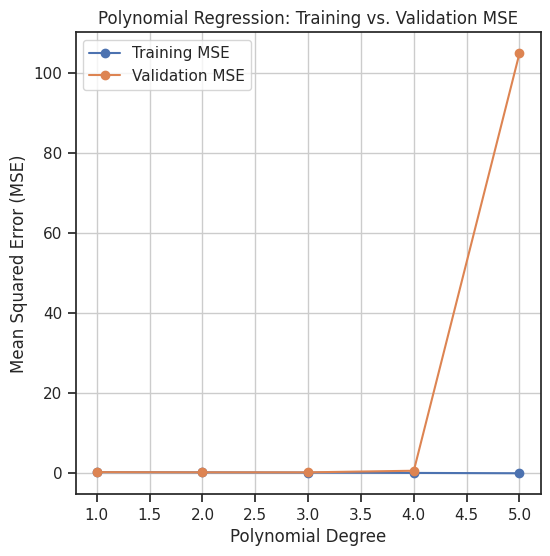

In [ ]:
train_mse = []
val_mse = []

degrees = [1, 2, 3, 4, 5] # For degrees 1 through 5

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    val_mse.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(6, 6))
plt.plot(degrees, train_mse, label='Training MSE', marker='o')
plt.plot(degrees, val_mse, label='Validation MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Polynomial Regression: Training vs. Validation MSE')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
train_mse

[0.29706141030634087,
 0.24571122830079203,
 0.1917798271343961,
 0.10671686082129898,
 0.02398926022385844]

In [46]:
val_mse

[0.3041880346525999,
 0.2538092455267946,
 0.2499828763943057,
 0.6507497290824219,
 104.96163175347266]

# **Results**

We got a better score with polynomial regression(80%) for this dataset compared to linear regression(76%) which means the data follows a non linear trend and polynomial regression is the better fit.

we also got high R^2 score and lower RMSE values for polynomial regression which says that our predicted values are actually closer to the actual values on average compared to the linear model


---


# The evaluation metrics we used are

**For Linear Regression:**

  *   RMSE value with 4-fold cross validation and R^2 score which were 0.547 and 76% respectively.

  *   In addition, we calculated RMSE for ridge, Lasso, and Elastic Net with different penalty terms(alpha value).

  *   Performed SGD with different learning rates and different batch sizes for 100 iterations and calculated training and valiation loss



**For Polynomial Regression:**

*   We only used RMSE value with 4-fold cross validation and R^2 score for polynomial regression with degree 3 and we got 0.27 and 79.95 respectively.

*   we calculated RMSE for ridge, Lasso, and Elastic Net with different penalty terms(alpha value) for polynomial regression.


*   We plotted a training and validation MSE for polynomial regression. For validation MSE, there's a huge jump from degree 4 to 5(from 0.65 to 104) which tells us that the model got progressively worse from degree 4 to degree 5 which makes the model's prediction less accurate.

---

References:

https://www.statology.org/linear-regression/

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

https://chat.openai.com/ (for SGD and also for few errors in the code)

https://medium.com/@creatrohit9/lasso-ridge-elastic-net-regression-a-complete-understanding-2021-b335d9e8ca3

